In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize as opt
from scipy.stats import beta, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.html.widgets import interact
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
np.random.seed(123)

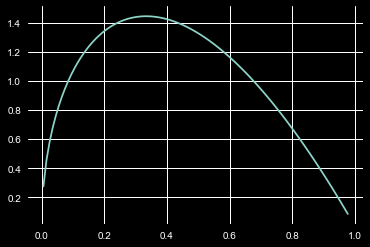

In [11]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999,a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

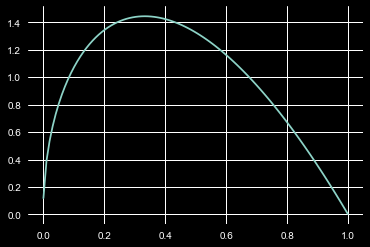

In [10]:
a, b = 1.5, 2.0
x = np.linspace(0.001, 0.999, 100)
plt.plot(x, beta.pdf(x, a, b))

In [28]:
# ベータ確率分布における最大値を求めるため、scypi のopt関数を用いて求める
f = beta(a=a, b=b).pdf
res = opt.fmin(lambda x: -f(x), 0.3)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


In [30]:
y_max = f(res)

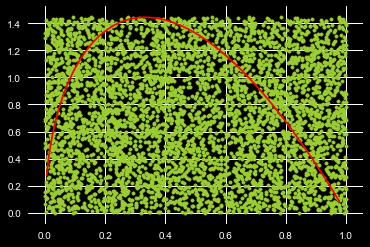

In [38]:
NMCS = 5000
x_mcs = uniform.rvs(size=NMCS) # 一様分布
r = uniform.rvs(size=NMCS)* y_max # 一様分布
plt.scatter(x_mcs, r, marker='.', color='yellowgreen')
plt.plot(x, beta.pdf(x,a,b), label = 'target', color= 'red')

In [44]:
accept = x_mcs[r<=f(x_mcs)]

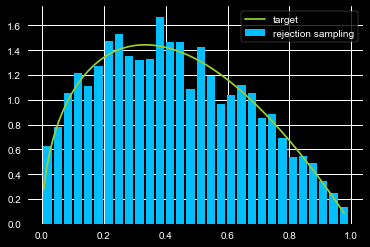

In [49]:
plt.hist(accept, density=True, bins=30, rwidth=0.8, 
         label='rejection sampling', color='deepskyblue')
plt.plot(x, beta.pdf(x,a,b), label = 'target', color= 'yellowgreen')
plt.legend(frameon=True)